In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, ZeroPadding2D
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from sklearn.model_selection import train_test_split
import os
from PIL import Image

In [2]:
# # Меняем разрешение изображений 
# path_Bike='/Users/Julaysa/Desktop/Bike/'
# with os.scandir(path=path_Bike) as it:
#     for entry in it:
#             #print("file:\t" + entry.name) #имя файлов 
#             img_obj = Image.open(path_Bike + entry.name)
#             img_obj = img_obj.resize((150, 200)) # Размер изображений пиксели 
#             img_obj.save(path_Bike + entry.name)

# path_Car='/Users/Julaysa/Desktop/Car/'
# with os.scandir(path=path_Car) as it:
#     for entry in it:
#             #print("file:\t" + entry.name) #имя файлов 
#             img_obj = Image.open(path_Car + entry.name)
#             img_obj = img_obj.resize((150, 200)) # Размер изображений пиксели 
#             img_obj.save(path_Car + entry.name)

In [3]:
def loadImages(path):
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        loadedImages.append(plt.imread(path + image))
    return np.array(loadedImages)

In [4]:
Bike = loadImages("/Users/Julaysa/Машинное обучение/Сверточные/Bike/")
Car = loadImages("/Users/Julaysa/Машинное обучение/Сверточные/Car/")

In [5]:
Bike=Bike/255
Car=Car/255

In [6]:
photo = np.concatenate((Bike, Car), axis=0)
label_first = np.concatenate((np.zeros(52), np.ones(52)), axis=0)
label_second = np.concatenate((np.ones(52), np.zeros(52)), axis=0)
label_almost = np.vstack((label_first, label_second))
label = label_almost.swapaxes(1,0)
photo.shape

(104, 224, 224, 3)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(photo, label, test_size=0.2, random_state=42)

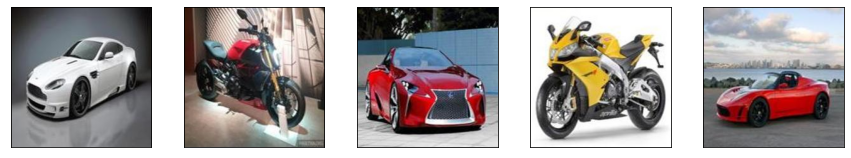

In [8]:
plt.figure(figsize=(15,15))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [9]:
a=[]
for i in range(5):
    if  y_train[i][0]>0.5:
        a.append("Car")
    else:
        a.append("Bike")
a

['Car', 'Bike', 'Car', 'Bike', 'Car']

In [10]:
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(2, activation='softmax'))

In [11]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train,
          epochs=25,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/25
3/3 [==============================] - 35s 10s/step - loss: 5.2676 - accuracy: 0.4458 - val_loss: 1.1151 - val_accuracy: 0.5238
Epoch 2/25
3/3 [==============================] - 20s 7s/step - loss: 1.4244 - accuracy: 0.5060 - val_loss: 0.7193 - val_accuracy: 0.4762
Epoch 3/25
3/3 [==============================] - 20s 7s/step - loss: 0.7590 - accuracy: 0.4819 - val_loss: 0.6983 - val_accuracy: 0.4762
Epoch 4/25
3/3 [==============================] - 20s 7s/step - loss: 0.6639 - accuracy: 0.7711 - val_loss: 0.6861 - val_accuracy: 0.6667
Epoch 5/25
3/3 [==============================] - 20s 7s/step - loss: 0.6738 - accuracy: 0.5422 - val_loss: 0.6814 - val_accuracy: 0.8095
Epoch 6/25
3/3 [==============================] - 20s 7s/step - loss: 0.6632 - accuracy: 0.7831 - val_loss: 0.6700 - val_accuracy: 0.7143
Epoch 7/25
3/3 [==============================] - 20s 7s/step - loss: 0.6188 - accuracy: 0.7590 - val_loss: 0.6360 - val_accuracy: 0.7143
Epoch 8/25
3/3 [=================

# Сохранение 

In [16]:
model.save('model_cb.h5')
# Загрузка
#from.tensorflow.keras.models import load_model
#model_save=load_model('model_cb.h5')

# Прогноз модели

In [27]:
# path_p='/Users/Julaysa/Desktop/Predict_b_c/'
# with os.scandir(path=path_p) as it:
#     for entry in it:
#             #print("file:\t" + entry.name) #имя файлов 
#             img_obj = Image.open(path_p + entry.name)
#             img_obj = img_obj.resize((150, 200)) # Размер изображений пиксели 
#             img_obj.save(path_p + entry.name)


x_new = loadImages("/Users/Julaysa/Машинное обучение/Сверточные/pred/")
x_new=x_new/255


In [28]:
pred=model.predict(x_new)

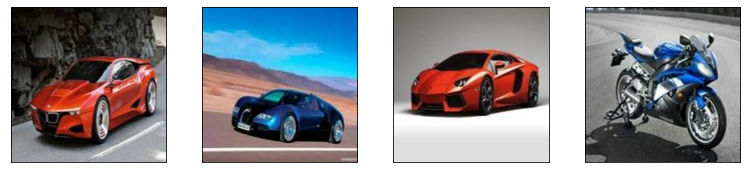

In [29]:
plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_new[i], cmap=plt.cm.binary)
plt.show()

In [30]:
b=[]
for i in range(4):
    if  pred[i][0]>0.5:
        b.append("Car")
    else:
        b.append("Bike")
b

['Car', 'Car', 'Car', 'Bike']